

# Accessing Databases with SQL Magic(Python)

### Author: Edeh Emeka Nweke




*   Perform simplified database access using SQL "magic"
**The datasets used for this analysis are not mine**


##### To communicate with SQL Databases from within a JupyterLab notebook, we can use the SQL "magic" provided by the [ipython-sql](https://github.com/catherinedevlin/ipython-sql) extension. "Magic" is Jupyter term for special commands that start with "%". Below, we'll use the *load*\_*ext* magic to load the ipython-sql extension. 


In [1]:
!pip install sqlalchemy==1.3.9
#!pip install ibm_db_sa #In my case, this is not needed since i am using sqlite connector.

You should consider upgrading via the 'c:\users\edeh emeka nweke\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for sqlalchemy, since package 'wheel' is not installed.
    Running setup.py install for sqlalchemy: started
    Running setup.py install for sqlalchemy: finished with status 'done'


You should consider upgrading via the 'c:\users\edeh emeka nweke\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  Using cached ibm_db-3.1.0.tar.gz (797 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Using legacy 'setup.py install' for ibm-db-sa, since package 'wheel' is not installed.
  Created wheel for ibm-db: filename=ibm_db-3.1.0-py3-none-any.whl size=27453159 sha256=be78a699a7c48d9bf5d833b622b955dd077cd8539a811b7f538103edac9e83ab
  Stored in directory: c:\users\edeh emeka nweke\appdata\local\pip\cache\wheels\0a\dd\10\4a9ad59949e39786d729813e4bce24ccf2263c6d60a62de2f2
Successfully built ibm-db
    Running setup.py install for ibm-db-sa: started
    Running setup.py ins

In [2]:
!pip install ipython-sql 

You should consider upgrading via the 'c:\users\edeh emeka nweke\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for prettytable, since package 'wheel' is not installed.
    Running setup.py install for prettytable: started
    Running setup.py install for prettytable: finished with status 'done'


In [38]:
import sqlalchemy
import pandas as pd
import sqlite3


" ### ipython-sql enables us to run SQL queries directly from a Jupyter Notebook. No need to write multiple lines of code to connect to the database or wrap the query in a string. ipython-sql makes querying a database from Jupyter Notebook “cleaner”."

## Then load the SQL module: using the command below

In [3]:
%load_ext sql

In [5]:
%sql sqlite:// #In this case, i am using sqlite connection string.

##### Now we have access to SQL magic.


##### For convenience, we can use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL. Let's use this to create a table and fill it with some test data for experimenting.


In [6]:
%%sql

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53)


 * sqlite://
Done.
99 rows affected.


[]

In [13]:
%sql SELECT * from INTERNATIONAL_STUDENT_TEST_SCORES;

 * sqlite://
Done.


country,first_name,last_name,test_score
United States,Marshall,Bernadot,54
Ghana,Celinda,Malkin,51
Ukraine,Guillermo,Furze,53
Greece,Aharon,Tunnow,48
Russia,Bail,Goodwin,46
Poland,Cole,Winteringham,49
Sweden,Emlyn,Erricker,55
Russia,Cathee,Sivewright,49
China,Barny,Ingerson,57
Uganda,Sharla,Papaccio,55


#### Using Python Variables in your SQL Statements

##### You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.

##### For example, if I have a python variable `country` with a value of `"Canada"`, I can use this variable in a SQL query to find all the rows of students from Canada.


In [7]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country

 * sqlite://
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


#### Assigning the Results of Queries to Python Variables


##### You can use the normal python assignment syntax to assign the results of your queries to python variables.

##### For example, I have a SQL query to retrieve the distribution of test scores (i.e. how many students got each score). I can assign the result of this query to the variable `test_score_distribution` using the `=` operator.


In [12]:
test_score_distribution = %sql SELECT test_score, count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
test_score_distribution

 * sqlite://
Done.


test_score,Frequency
38,2
40,1
43,2
44,2
45,8
46,7
47,4
48,14
49,8
50,10


#### Using an extrnal dataset


In [48]:
df = pd.read_csv('WorldPop.csv')
df.head

<bound method NDFrame.head of              Country   Population_2020 Yearly_Change  Net_Change  \
0               China       1440297825         0.39%     5540090   
1               India       1382345085         0.99%    13586631   
2       United States        331341050         0.59%     1937734   
3           Indonesia        274021604         1.07%     2898047   
4            Pakistan        221612785         2.00%     4327022   
..                ...              ...           ...         ...   
230        Montserrat             4993         0.06%           3   
231  Falkland Islands             3497         3.05%         103   
232              Niue             1628         0.68%          11   
233           Tokelau             1360         1.27%          17   
234          Holy See              801         0.25%           2   

     Density_Per_KmA)  Land Area (Km²)  Migrants (net) Fert. Rate Med. Age  \
0                 153          9388211       -348399.0        1.7       38 

#### I will create a connection using sqlite3 library. My df will be seen as a table in my database


In [57]:
cnn = sqlite3.connect('df.db')
%sql sqlite:///df.db
df.to_sql('df', cnn )

In [62]:
top_pop =  %sql select * FROM df where Population_2020 >70000000
top_pop

   sqlite://
 * sqlite:///df.db
   sqlite:///world.db
Done.


index,Country,Population_2020,Yearly_Change,Net_Change,Density_Per_KmA),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1382345085,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331341050,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,274021604,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,221612785,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
5,Brazil,212821986,0.72%,1509890,25,8358140,21200.0,1.7,33,88%,2.73%
6,Nigeria,206984347,2.58%,5175990,226,910770,-60000.0,5.4,18,52%,2.64%
7,Bangladesh,164972348,1.01%,1643222,1265,130170,-369501.0,2.1,28,39%,2.11%
8,Russia,145945524,0.04%,62206,9,16376870,182456.0,1.8,40,74%,1.87%
9,Mexico,129166028,1.06%,1357224,66,1943950,-60000.0,2.1,29,84%,1.65%


#### Converting Query Results to DataFrames


##### You can easily convert a SQL query result to a pandas dataframe using the `DataFrame()` method. Dataframe objects are much more versatile than SQL query result objects. For example, we can easily graph our test score distribution after converting to a dataframe.


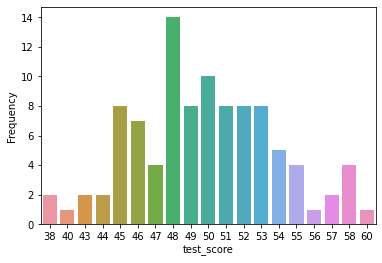

In [64]:
dataframe = test_score_distribution.DataFrame()

%matplotlib inline
# uncomment the following line if you get an module error saying seaborn not found
# !pip install seaborn
import seaborn

plot = seaborn.barplot(x='test_score',y='Frequency', data=dataframe)

### Using Top_Pop Query Result


##### Checking for the relationship between Population and Fertility Rate from the top_pop result after first converting the result to dataframe

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
Top_Country = top_pop.DataFrame()

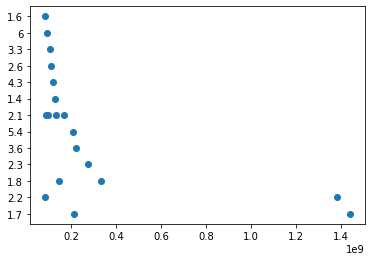

In [71]:
x = Top_Country['Population_2020']
y = Top_Country['Fert. Rate']

plt.scatter(x, y) 
plt.show()